In [34]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

In [35]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)

df = pd.concat([X,y], axis=1)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [36]:
X.shape

(48842, 14)

In [37]:
y.shape

(48842, 1)

## Check the data

In [38]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [39]:
df.shape

(48842, 15)

In [40]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


We to transform the '?' values to null

In [42]:
df[df == '?'] = np.nan

We study the percentage of null values in each column.

In [43]:
porcentaje_nulos = (df.isnull().sum() / len(df)) * 100

print("Porcentaje de valores nulos en cada columna:")
print(porcentaje_nulos)

Porcentaje de valores nulos en cada columna:
age               0.000000
workclass         5.730724
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.751198
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.754637
income            0.000000
dtype: float64


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


I want to know the different categories there are and their values in the categorical variables.

variablescategoricas=['workclass', 'occupation', 'native-country', 'income']
for i in df[variablescategoricas]: # bucle para todas las columnas del dataframe
    print(i)
    print('Categorías:')
    print(df[i].value_counts())
    print()

## Data transformation

For the variable 'income' we have seen that there are values that represent the same informartion but are written different.

In [45]:
df['income'] = df['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})

The summary shows that the variables - workclass, occupation and native.country contain missing value.I will impute the missing values with the most frequent value, the mode, for workclass and native.country because there is a category that stands out much more than the others. On the other hand, for occupation I will eliminate the nulls

In [46]:
df1 = df.dropna(subset=['occupation'])

for col in ['workclass', 'native-country']:
    df1[col].fillna(df1[col].mode()[0], inplace=True)

C:\Users\alvar\AppData\Local\Temp\ipykernel_19308\1485085576.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].fillna(df1[col].mode()[0], inplace=True)


In [47]:
df1.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Now we will separate the data set into the variable to be predicted 'y' and the predictor variables 'x'.

In [48]:
X = df1.drop(['income'], axis=1)

y = df1['income']

We transform categorical variables in X with Label Encoder

In [49]:
from sklearn import preprocessing

categorical = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X[feature] = le.fit_transform(X[feature])

We standardize the X variables

In [50]:
from sklearn.preprocessing import StandardScaler

X_stand = StandardScaler().fit_transform(X)
X_stand = pd.DataFrame(X_stand, columns=X.columns)
X_stand.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.033580,2.917802,-1.064618,-0.343334,1.119747,0.942739,-1.486080,-0.257918,0.389597,0.692456,0.139623,-0.218916,-0.078962,0.260513
1,0.866653,1.873791,-1.009676,-0.343334,1.119747,-0.392392,-0.740440,-0.883984,0.389597,0.692456,-0.146826,-0.218916,-2.326913,0.260513
2,-0.042154,-0.214232,0.244999,0.181138,-0.440294,-1.727524,-0.243347,-0.257918,0.389597,0.692456,-0.146826,-0.218916,-0.078962,0.260513
3,1.093855,-0.214232,0.425850,-2.441220,-1.220314,-0.392392,-0.243347,-0.883984,-1.986439,0.692456,-0.146826,-0.218916,-0.078962,0.260513
4,-0.799493,-0.214232,1.408920,-0.343334,1.119747,-0.392392,0.750839,2.246347,-1.986439,-1.444136,-0.146826,-0.218916,-0.078962,-5.378274


We also transform the variable y with label encoding and convert it into a dataframe

In [51]:
y_encod = le.fit_transform(y)
y_encod = pd.DataFrame(y_encod, columns=['income'])

## Feature Selection

We build a correlation matrix between the variables to see which of them have a lower correlation with the variable to be predicted 'income' and thus be able to discard them from our model.

In [52]:
df_trans  = pd.concat([X_stand, y_encod], axis=1)
df_trans

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.033580,2.917802,-1.064618,-0.343334,1.119747,0.942739,-1.486080,-0.257918,0.389597,0.692456,0.139623,-0.218916,-0.078962,0.260513,0
1,0.866653,1.873791,-1.009676,-0.343334,1.119747,-0.392392,-0.740440,-0.883984,0.389597,0.692456,-0.146826,-0.218916,-2.326913,0.260513,0
2,-0.042154,-0.214232,0.244999,0.181138,-0.440294,-1.727524,-0.243347,-0.257918,0.389597,0.692456,-0.146826,-0.218916,-0.078962,0.260513,0
3,1.093855,-0.214232,0.425850,-2.441220,-1.220314,-0.392392,-0.243347,-0.883984,-1.986439,0.692456,-0.146826,-0.218916,-0.078962,0.260513,0
4,-0.799493,-0.214232,1.408920,-0.343334,1.119747,-0.392392,0.750839,2.246347,-1.986439,-1.444136,-0.146826,-0.218916,-0.078962,-5.378274,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46028,-0.420823,-0.214232,0.525306,-0.343334,1.119747,0.942739,0.750839,0.994215,0.389597,0.692456,-0.146826,-0.218916,-0.078962,0.260513,0
46029,0.033580,-0.214232,0.242846,-0.343334,1.119747,-1.727524,0.750839,-0.257918,0.389597,-1.444136,-0.146826,-0.218916,-0.411992,0.260513,0
46030,-0.042154,-0.214232,1.755680,-0.343334,1.119747,-0.392392,0.750839,-0.883984,0.389597,0.692456,-0.146826,-0.218916,0.753612,0.260513,0
46031,0.412250,-0.214232,-1.004177,-0.343334,1.119747,-1.727524,-1.486080,0.994215,-3.174457,0.692456,0.571931,-0.218916,-0.078962,0.260513,0


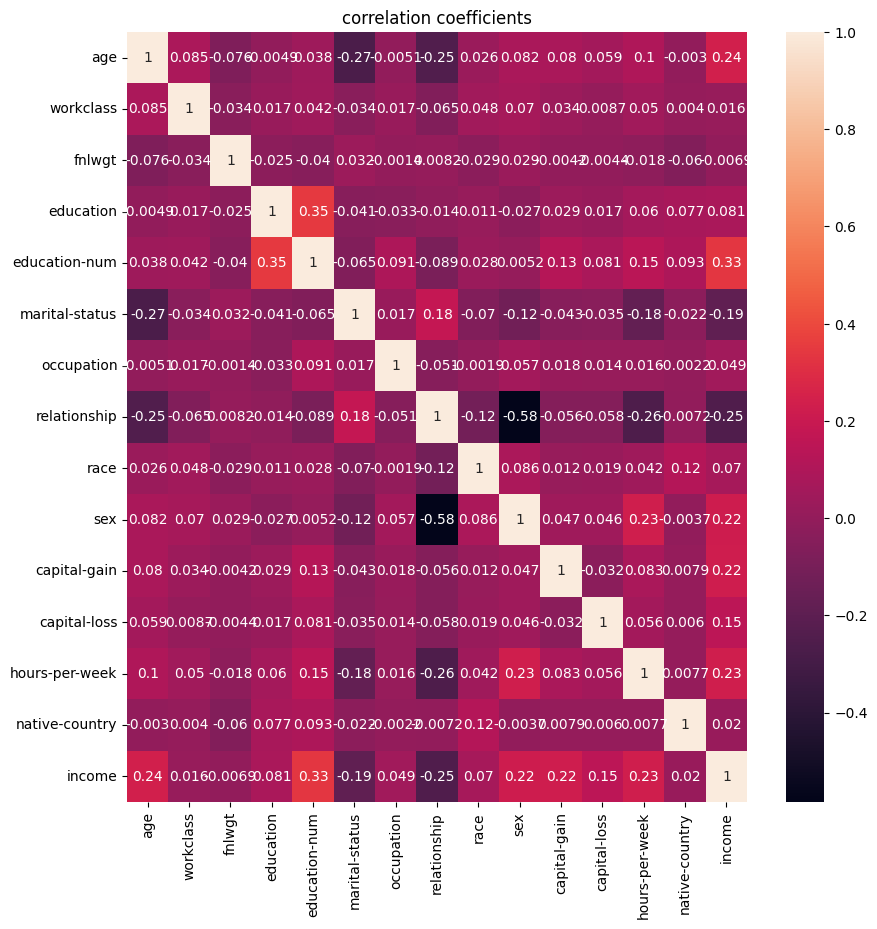

In [53]:
cols = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country', 'income']

plt.figure(figsize=(10,10))#fijamos el tamaño para poder ver algo
hm = sns.heatmap(df_trans[cols].corr(),
                 cbar=True,
                 annot=True)
plt.title('correlation coefficients')
plt.show()

All variables with a correlation less than 0.1 with the 'income' variable may be eliminated

## Logistic Regression model

In [54]:
from sklearn.model_selection import train_test_split

y = df1['income']

X_stand_red = X_stand.drop(['fnlwgt', 'workclass', 'native-country', 'race', 'occupation', 'education'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_stand_red, y, test_size=0.3, random_state=42)

In [55]:
X_train

,age,education-num,marital-status,relationship,sex,capital-gain,capital-loss,hours-per-week
26187,-1.481098,-0.050284,0.942739,0.994215,0.692456,-0.146826,-0.218916,-0.911536
37506,1.093855,-0.830304,-0.392392,-0.883984,0.692456,-0.146826,-0.218916,0.337325
9827,-1.026694,1.119747,0.942739,-0.257918,-1.444136,-0.146826,-0.218916,-0.495249
43333,-0.269355,-0.440294,-0.392392,-0.883984,0.692456,-0.146826,-0.218916,-0.078962
4020,0.185048,-0.050284,-0.392392,-0.883984,0.692456,-0.146826,-0.218916,1.253157
...,...,...,...,...,...,...,...,...
11284,-1.178162,1.119747,0.942739,0.994215,-1.444136,-0.146826,-0.218916,-1.744111
44732,1.018121,-0.440294,-0.392392,-0.883984,0.692456,-0.146826,-0.218916,-0.078962
38158,0.790919,-0.440294,-1.727524,-0.257918,-1.444136,-0.146826,-0.218916,-0.078962
860,3.214405,-0.440294,-0.392392,-0.883984,0.692456,-0.146826,-0.218916,-0.911536


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

logreg = LogisticRegression(penalty=None, solver= 'newton-cg')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print("Precision:", "{0:0.4f}".format(precision_score(y_test,y_pred, pos_label='>50K')))

y_probs = logreg.predict_proba(X_test) #Predict class probabilities for X.The predicted class probabilities of an input sample are computed as the mean predicted class probabilities of the trees in the forest
y_probs = y_probs[:, 1]
print(f'AUC score: {"{:.4f}".format(roc_auc_score(y_test, y_probs))}')

Logistic Regression accuracy score with all the features: 0.8169
Precision: 0.7005
AUC score: 0.8448


## Logistic Regression with PCA

Scikit-Learn's PCA class implements PCA algorithm using the code below. Before diving deep, I will explain another important concept called explained variance ratio.

A very useful piece of information is the explained variance ratio of each principal component. It is available via the explained_variance_ratio_ variable. It indicates the proportion of the dataset’s variance that lies along the axis of each principal component.

In [57]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.24931199, 0.14555966, 0.13255555, 0.12770978, 0.11067457,
       0.09889554, 0.0876133 , 0.04767961])

#### Comment
We can see that approximately 95.24% of variance is explained by the first 7 variables.

Only 4.16 75% of variance is explained by the last variable. So, we can assume that it carries littlenformation.



So, I will drop it, train the model again and calculate the accuracy.

In [60]:
X1_stand = X_stand_red.iloc[:, :-1]
y = df1['income']


X1_train, X1_test, y1_train, y1_test = train_test_split(X1_stand, y, test_size = 0.3, random_state = 42)



logreg = LogisticRegression()
logreg.fit(X1_train, y1_train)
y1_pred = logreg.predict(X1_test)

print('Logistic Regression accuracy score with the first 13 features: {0:0.4f}'. format(accuracy_score(y1_test, y1_pred)))
print("Precision:", "{0:0.4f}".format(precision_score(y1_test,y1_pred, pos_label='>50K')))

y1_probs = logreg.predict_proba(X1_test) #Predict class probabilities for X.The predicted class probabilities of an input sample are computed as the mean predicted class probabilities of the trees in the forest
y1_probs = y1_probs[:, 1]
print(f'AUC score: {"{:.4f}".format(roc_auc_score(y1_test, y1_probs))}')

Logistic Regression accuracy score with the first 13 features: 0.8175
Precision: 0.7075
AUC score: 0.8385


We see that precision has improved and we have not lost too much information since more than 95% of the variables that explain the variance are present. If we continued removing more variables we would lose information, therefore this is the best model we have been able to achieve.